<a href="https://colab.research.google.com/github/machio1985/deep-learning-from-scratch/blob/master/deep_learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep-learning-from-scratch

作成：2021/07/04

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
!git clone https://github.com/machio1985/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 457 (delta 0), reused 1 (delta 0), pack-reused 453
Receiving objects: 100% (457/457), 5.52 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (235/235), done.


## ch01


### P11

In [14]:
# coding: utf-8
class Man:
    """サンプルクラス"""

    def __init__(self,name):
        self.name = name
        print("Initilized!")

    def hello(self):
        print("Hello " + self.name + "!")

    def goodbye(self):
        print("Good-bye " + self.name + "!")

m = Man("David")
m.hello()
m.goodbye()

Initilized!
Hello David!
Good-bye David!


* クラスを定義する時にはselfで初期化が必要。


### P15

In [6]:
import numpy as np

X = np.array([[51,55],[14,19],[0,4]])
print(X)

[[51 55]
 [14 19]
 [ 0  4]]


In [7]:
for row in X:
  print(row)

[51 55]
[14 19]
[0 4]


### P17

In [15]:
import matplotlib.pyplot as plt
x = np.arange(0,6,0.1)
y = np.sin(x)

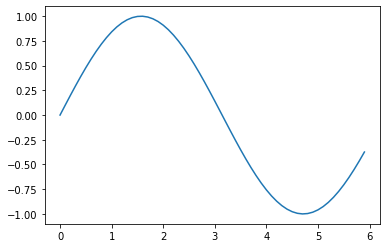

In [13]:
plt.plot(x,y)
plt.show()

## ch02


### P25

In [20]:
def AND(x1,x2):
  w1,w2,theta = 0.5,0.5,0.7
  tmp = x1*w1 + x2*w2 
  if tmp <= theta :
    return 0
  elif tmp > theta:
    return 1

In [23]:
AND(0,0)

0

In [24]:
AND(1,0)

0

In [25]:
AND(0,1)

0

In [26]:
AND(1,1)

1

### 2,3.2 重みとバイアス

In [30]:
import numpy as np
x = np.array([ 0 , 1 ])
w = np.array([ 0.5 , 0.5 ])
b = -0.7 

w*x

np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 実装


In [41]:
def AND(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ 0.5 , 0.5 ])
  b = -0.7 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else: 
    return 1

In [35]:
# NAND は ともに1の時だけ0
def NAND(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ -0.5 , -0.5 ])
  b = 0.7 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else :
    return 1

# ORはどちらかが1なら1
def OR(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ 0.5 , 0.5 ])
  b = -0.2 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else :
    return 1

### XOR 
* XOR は　線形で分けれない。　　

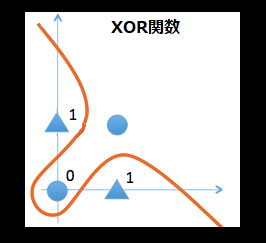

In [42]:
def XOR(x1 , x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)
  return y 

In [43]:
XOR(1,0)

1

##ch03　非線形関数
### 3.2.2

In [48]:
def step_function(x):
   y = x > 0
   return y.astype(np.int)

In [52]:
import numpy as np
x = np.array([-1.0,1.0,2.0])
x 

array([-1.,  1.,  2.])

In [55]:
y = x > 0 
y

array([False,  True,  True])

In [56]:
y = y.astype(np.int)
y

array([0, 1, 1])

### ステップ関数

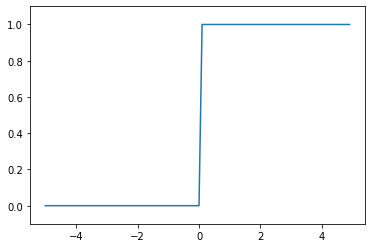

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x>0 , dtype = np.int) 

#arangeは15から5を0.1刻み。
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### シグモイド関数


In [63]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [65]:
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

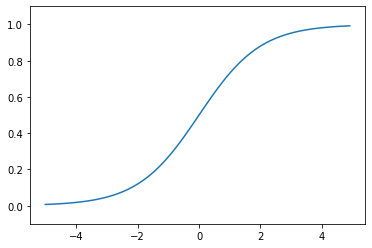

In [70]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### ニューラルネットワークの行列の積


In [71]:
X = np.array([1,2])
X.shape

(2,)

In [72]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [73]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


###ニューラルネットワークの実装

In [76]:
#１層目
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

#dotは行列の積
A1 = np.dot(X,W1) + B1
A1

array([0.3, 0.7, 1.1])

In [79]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [82]:
#２層目
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [85]:
#出力層

#これはそのまま出す恒等関数
def identity_function(x):
  return x 

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
Z2 = sigmoid(A3)
Y = identity_function(A3)
Y

array([0.29132754, 0.64051015])

### 実装まとめ


In [90]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['B1'] = np.array([0.1,0.2,0.3])

  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['B2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['B3'] = np.array([0.1,0.2])

  return network

In [93]:
def forword(network,x):
  W1,W2,W3 = network['W1'] , network['W2'] , network['W3']
  B1,B2,B3 = network['B1'] , network['B2'] , network['B3']

  a1 = np.dot(x , W1) + B1 
  z1 = sigmoid(a1)
  a2 = np.dot(z1 , W2) + B2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + B3 
  y = identity_function(a3)

  return y

In [94]:
network = init_network()
x = np.array([1.0,0.5])
y = forword(network,x)
print(y)

[0.31682708 0.69627909]


### 出力層の設計

* 回帰の時は恒等関数。分類の時はソフトマックス関数

In [98]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [99]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [101]:
y = exp_a/sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [102]:
#softmax
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [104]:
#大きすぎるとオーバーフローする。
a = np.array([1010,1000,990])
exp_a = np.exp(a)/np.sum(exp_a)
exp_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [105]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [107]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [109]:
#オーバーフロー対策をするsoftmax
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [110]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [111]:
sum(y)

1.0

* yは0~1の間。yの総和は1
* ゆえにyを確率的に取り扱える

### MNIST

In [165]:
!python /content/drive/MyDrive/deep-learning-from-scratch/dataset/mnist.py

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [175]:
%cd /content/drive/MyDrive/deep-learning-from-scratch
os.getcwd()

/content/drive/MyDrive/deep-learning-from-scratch


'/content/drive/MyDrive/deep-learning-from-scratch'

In [176]:
import sys , os 
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [181]:
(x_train,t_train),(x_test,t_test) = load_mnist(flatten = True ,normalize = False)

In [185]:
x_train.shape,t_train.shape,x_test.shape,t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [188]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

5
(784,)
(28, 28)


In [195]:
img_show(img)

In [204]:
# neuralnet_mnist.py
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1 #累積和

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [209]:
x,_ = get_data()
network = init_network()
W1,W2,W3 = network['W1'] , network['W2'] , network['W3']

x.shape , x[0].shape , W1.shape , W2.shape , W3.shape

((10000, 784), (784,), (784, 50), (50, 100), (100, 10))

In [217]:
# バッチ処理
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x) , batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p= np.argmax(y_batch,axis=1) # 最も確率の高い要素のインデックスを取得
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) #累積和

print("Accuracy:" + str(float(accuracy_cnt) / len(x) ))

Accuracy:0.9352
